In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from tensorflow.python.keras import metrics
from tensorflow.python import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# 파일읽기

In [2]:
df=pd.read_excel('./modeling_data/2Weeks_data.xlsx')

In [3]:
df

,Unnamed: 0,ID,Weight,BMI,Step,Burn,Eat,Sleep,Height,Label,Unnamed: 10
0,0,#AAGQKY,45.0,20.544193,72.0,0.0,0.0,0.0,148.0,0,73.0
1,1,#AAGQKY,45.0,20.544193,72.0,0.0,0.0,0.0,148.0,0,1755.0
2,2,#AAGQKY,45.0,20.544193,72.0,0.0,0.0,0.0,148.0,0,102.0
3,3,#AAGQKY,45.0,20.544193,72.0,0.0,0.0,0.0,148.0,0,NaN
4,4,#AAGQKY,45.0,20.544193,72.0,0.0,0.0,0.0,148.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1927,1927,#ZZLSSL,68.0,29.048656,0.0,0.0,0.0,0.0,153.0,0,NaN
1928,1928,#ZZLSSL,68.0,29.048656,0.0,0.0,0.0,0.0,153.0,0,NaN
1929,1929,#ZZLSSL,68.0,29.048656,0.0,0.0,0.0,0.0,153.0,0,NaN
1930,1930,#ZZLSSL,68.0,29.048656,0.0,0.0,0.0,0.0,153.0,0,NaN


# 데이터를 필요한 부분으로 X, Y 나눠 읽어오기

In [4]:
X=df.iloc[:,2:8]
y_origin=df['Label']
y=df['Label']

# train, test, validation set 으로 데이터 나누기

In [5]:
#Scaling
ms=MinMaxScaler()
X=ms.fit_transform(X)

# 데이터 train, vali, test 6:2:2
train_x=X[:1163]
val_x=X[1163:1548]
test_x=X[1548:]

train_y=y[:1163]
val_y=y[1163:1548]
test_y=y[1548:]

train_y=train_y.to_numpy()
val_y=val_y.to_numpy()
test_y=test_y.to_numpy()

In [6]:
smote = SMOTE(random_state=0)
train_x2,train_y2 = smote.fit_resample(train_x,train_y)

# smote_test = SMOTE(random_state=0)
# test_x,test_y = smote_test.fit_resample(test_x,test_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', train_x2.shape, train_y2.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(train_y).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(train_y2).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1163, 6) (1163,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3153, 6) (3153,)
SMOTE 적용 전 레이블 값 분포: 
  0    1051
 1      63
-1      49
dtype: int64
SMOTE 적용 후 레이블 값 분포: 
  0    1051
-1    1051
 1    1051
dtype: int64


# 원핫인코딩

## 예시 : 1 , 2 -> (1,0) , (0,1)

In [7]:
train_y2=pd.get_dummies(train_y2)
val_y=pd.get_dummies(val_y)
test_y=pd.get_dummies(test_y)

In [8]:
test_y

,-1,0,1
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
379,0,1,0
380,0,1,0
381,0,1,0
382,0,1,0


# 모델

## Deep Neural Network

## Input Feature : 6

## Hidden Layer : 128 - 256 - 128

## optimizer : adam, loss : categorical_crossentropy

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_x2, train_y2, epochs=500,validation_data=(val_x, val_y), batch_size=6)

predicted=model.predict(test_x)
test_loss, test_acc = model.evaluate(test_x, test_y)

Epoch 1/500
526/526 [==============================] - 1s 1ms/step - loss: 1.0317 - accuracy: 0.4688 - val_loss: 1.0709 - val_accuracy: 0.4494
Epoch 2/500
526/526 [==============================] - 0s 859us/step - loss: 0.9419 - accuracy: 0.5496 - val_loss: 0.8494 - val_accuracy: 0.6130
Epoch 3/500
526/526 [==============================] - 0s 874us/step - loss: 0.8829 - accuracy: 0.5905 - val_loss: 0.7674 - val_accuracy: 0.6182
Epoch 4/500
526/526 [==============================] - 0s 850us/step - loss: 0.8472 - accuracy: 0.6181 - val_loss: 0.7792 - val_accuracy: 0.5922
Epoch 5/500
526/526 [==============================] - 0s 850us/step - loss: 0.7922 - accuracy: 0.6384 - val_loss: 0.9722 - val_accuracy: 0.4987
Epoch 6/500
526/526 [==============================] - 0s 897us/step - loss: 0.7374 - accuracy: 0.6749 - val_loss: 0.8562 - val_accuracy: 0.5429
Epoch 7/500
526/526 [==============================] - 0s 873us/step - loss: 0.6857 - accuracy: 0.7114 - val_loss: 0.8830 - val_accu

526/526 [==============================] - 0s 838us/step - loss: 0.1598 - accuracy: 0.9318 - val_loss: 2.3711 - val_accuracy: 0.7039
Epoch 114/500
526/526 [==============================] - 0s 880us/step - loss: 0.1614 - accuracy: 0.9337 - val_loss: 2.3503 - val_accuracy: 0.7143
Epoch 115/500
526/526 [==============================] - 0s 826us/step - loss: 0.1640 - accuracy: 0.9347 - val_loss: 2.5255 - val_accuracy: 0.7013
Epoch 116/500
526/526 [==============================] - 0s 836us/step - loss: 0.1585 - accuracy: 0.9305 - val_loss: 2.4087 - val_accuracy: 0.7013
Epoch 117/500
526/526 [==============================] - 0s 865us/step - loss: 0.1632 - accuracy: 0.9315 - val_loss: 2.3816 - val_accuracy: 0.6857
Epoch 118/500
526/526 [==============================] - 0s 825us/step - loss: 0.1519 - accuracy: 0.9353 - val_loss: 2.5692 - val_accuracy: 0.6909
Epoch 119/500
526/526 [==============================] - 0s 905us/step - loss: 0.1499 - accuracy: 0.9359 - val_loss: 2.5329 - val_ac

Epoch 169/500
526/526 [==============================] - 0s 810us/step - loss: 0.1505 - accuracy: 0.9391 - val_loss: 2.6909 - val_accuracy: 0.7325
Epoch 170/500
526/526 [==============================] - 0s 798us/step - loss: 0.1245 - accuracy: 0.9464 - val_loss: 2.9104 - val_accuracy: 0.6623
Epoch 171/500
526/526 [==============================] - 0s 802us/step - loss: 0.1474 - accuracy: 0.9366 - val_loss: 2.6927 - val_accuracy: 0.7169
Epoch 172/500
526/526 [==============================] - 0s 808us/step - loss: 0.1358 - accuracy: 0.9423 - val_loss: 2.8295 - val_accuracy: 0.6727
Epoch 173/500
526/526 [==============================] - 0s 817us/step - loss: 0.1270 - accuracy: 0.9461 - val_loss: 2.7639 - val_accuracy: 0.6883
Epoch 174/500
526/526 [==============================] - 0s 812us/step - loss: 0.1351 - accuracy: 0.9401 - val_loss: 2.8387 - val_accuracy: 0.6623
Epoch 175/500
526/526 [==============================] - 0s 805us/step - loss: 0.1387 - accuracy: 0.9404 - val_loss: 2

Epoch 225/500
526/526 [==============================] - 0s 825us/step - loss: 0.1191 - accuracy: 0.9477 - val_loss: 2.9674 - val_accuracy: 0.6805
Epoch 226/500
526/526 [==============================] - 0s 812us/step - loss: 0.1206 - accuracy: 0.9518 - val_loss: 3.1345 - val_accuracy: 0.6935
Epoch 227/500
526/526 [==============================] - 0s 812us/step - loss: 0.1206 - accuracy: 0.9464 - val_loss: 3.1876 - val_accuracy: 0.7143
Epoch 228/500
526/526 [==============================] - 0s 810us/step - loss: 0.1160 - accuracy: 0.9521 - val_loss: 2.9885 - val_accuracy: 0.7247
Epoch 229/500
526/526 [==============================] - 0s 807us/step - loss: 0.1098 - accuracy: 0.9486 - val_loss: 3.1805 - val_accuracy: 0.7195
Epoch 230/500
526/526 [==============================] - 0s 806us/step - loss: 0.1092 - accuracy: 0.9518 - val_loss: 3.1527 - val_accuracy: 0.7247
Epoch 231/500
526/526 [==============================] - 0s 819us/step - loss: 0.1166 - accuracy: 0.9486 - val_loss: 3

Epoch 281/500
526/526 [==============================] - 0s 812us/step - loss: 0.1129 - accuracy: 0.9524 - val_loss: 3.1327 - val_accuracy: 0.6935
Epoch 282/500
526/526 [==============================] - 0s 806us/step - loss: 0.1060 - accuracy: 0.9537 - val_loss: 3.1035 - val_accuracy: 0.7247
Epoch 283/500
526/526 [==============================] - 0s 809us/step - loss: 0.0985 - accuracy: 0.9575 - val_loss: 3.0603 - val_accuracy: 0.7143
Epoch 284/500
526/526 [==============================] - 0s 804us/step - loss: 0.1196 - accuracy: 0.9508 - val_loss: 3.0768 - val_accuracy: 0.7169
Epoch 285/500
526/526 [==============================] - 0s 802us/step - loss: 0.1102 - accuracy: 0.9575 - val_loss: 3.2204 - val_accuracy: 0.6779
Epoch 286/500
526/526 [==============================] - 0s 794us/step - loss: 0.1111 - accuracy: 0.9534 - val_loss: 2.9725 - val_accuracy: 0.7039
Epoch 287/500
526/526 [==============================] - 0s 800us/step - loss: 0.1028 - accuracy: 0.9546 - val_loss: 3

Epoch 337/500
526/526 [==============================] - 0s 814us/step - loss: 0.0907 - accuracy: 0.9591 - val_loss: 3.2732 - val_accuracy: 0.6857
Epoch 338/500
526/526 [==============================] - 0s 812us/step - loss: 0.1000 - accuracy: 0.9565 - val_loss: 3.1934 - val_accuracy: 0.7013
Epoch 339/500
526/526 [==============================] - 0s 802us/step - loss: 0.0989 - accuracy: 0.9607 - val_loss: 3.3482 - val_accuracy: 0.6649
Epoch 340/500
526/526 [==============================] - 0s 815us/step - loss: 0.1099 - accuracy: 0.9546 - val_loss: 3.1564 - val_accuracy: 0.6727
Epoch 341/500
526/526 [==============================] - 0s 817us/step - loss: 0.0975 - accuracy: 0.9540 - val_loss: 3.2861 - val_accuracy: 0.7065
Epoch 342/500
526/526 [==============================] - 0s 814us/step - loss: 0.0951 - accuracy: 0.9594 - val_loss: 3.4328 - val_accuracy: 0.7143
Epoch 343/500
526/526 [==============================] - 0s 815us/step - loss: 0.1015 - accuracy: 0.9556 - val_loss: 3

Epoch 393/500
526/526 [==============================] - 0s 784us/step - loss: 0.0907 - accuracy: 0.9597 - val_loss: 3.3511 - val_accuracy: 0.6753
Epoch 394/500
526/526 [==============================] - 0s 777us/step - loss: 0.0933 - accuracy: 0.9585 - val_loss: 3.3065 - val_accuracy: 0.6883
Epoch 395/500
526/526 [==============================] - 0s 785us/step - loss: 0.0836 - accuracy: 0.9648 - val_loss: 3.2083 - val_accuracy: 0.7065
Epoch 396/500
526/526 [==============================] - 0s 792us/step - loss: 0.0981 - accuracy: 0.9591 - val_loss: 3.2653 - val_accuracy: 0.7039
Epoch 397/500
526/526 [==============================] - 0s 787us/step - loss: 0.0830 - accuracy: 0.9651 - val_loss: 3.2895 - val_accuracy: 0.7221
Epoch 398/500
526/526 [==============================] - 0s 798us/step - loss: 0.0995 - accuracy: 0.9588 - val_loss: 3.4206 - val_accuracy: 0.6831
Epoch 399/500
526/526 [==============================] - 0s 787us/step - loss: 0.0901 - accuracy: 0.9600 - val_loss: 3

Epoch 449/500
526/526 [==============================] - 0s 823us/step - loss: 0.0835 - accuracy: 0.9619 - val_loss: 3.5312 - val_accuracy: 0.6961
Epoch 450/500
526/526 [==============================] - 0s 819us/step - loss: 0.0917 - accuracy: 0.9607 - val_loss: 3.6975 - val_accuracy: 0.6701
Epoch 451/500
526/526 [==============================] - 0s 825us/step - loss: 0.0833 - accuracy: 0.9638 - val_loss: 3.3278 - val_accuracy: 0.7273
Epoch 452/500
526/526 [==============================] - 0s 817us/step - loss: 0.0953 - accuracy: 0.9597 - val_loss: 3.6609 - val_accuracy: 0.6675
Epoch 453/500
526/526 [==============================] - 0s 819us/step - loss: 0.0775 - accuracy: 0.9664 - val_loss: 3.3952 - val_accuracy: 0.7091
Epoch 454/500
526/526 [==============================] - 0s 819us/step - loss: 0.0895 - accuracy: 0.9600 - val_loss: 3.3522 - val_accuracy: 0.7299
Epoch 455/500
526/526 [==============================] - 0s 823us/step - loss: 0.0869 - accuracy: 0.9594 - val_loss: 3

In [9]:
predicted

array([[2.1984397e-02, 9.7775912e-01, 2.5652896e-04],
       [9.9985886e-01, 1.4114140e-04, 6.9307275e-11],
       [9.9478143e-01, 5.2183769e-03, 1.3222488e-07],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

# 예측 정확도를 계산하는 부분

In [10]:
count=0
predicted_plot=[]
correct_plot=[]

count_array=[0 for j in range(3)]

predicted_result=[0 for j in range(len(test_y))]
for i in range(len(test_y)):
    maxIndex=tf.argmax(predicted[i])
    predicted_plot.append(maxIndex-1)
    #     print(type(maxIndex.numpy().item()))
    index=0
    if(y_origin[i]==-1):
        index=0 
    elif y_origin[i]==0:
        index=1
    elif y_origin[i]==1:
        index=2
    predicted_result[i]=index-1
    if index==maxIndex.numpy().item():
        count=count+1
        count_array[index]=count_array[index]+1

# 예측 정확도

## 맞춘 개수 , 전체 개수 , 정확도

In [11]:
print(count)
print(len(test_y))
print(count/len(test_y))

263
384
0.6848958333333334


# 시각화하는 부분
## -1(감소): 100, 0(유지): 355, 1(증가):23

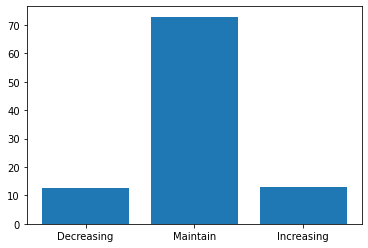

In [12]:
label=['Decreasing','Maintain','Increasing']
values=[count_array[0]/8*100,count_array[1]/355*100,count_array[2]/23*100]

x = np.arange(3)

plt.bar(x, values)
plt.xticks(x, label)

plt.show()

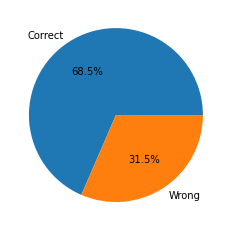

In [13]:
ratio = [count,len(test_y)-count]
labels = ['Correct', 'Wrong']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()